In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# Reading training data
df_train = pd.read_csv('Train1.csv')
df_train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,06-05-2011 00:00,3.75,14056,35
1,6349,1300,3682,6,11-05-2011 00:00,1.95,13098,35
2,16783,2178,1939,4,20-11-2011 00:00,5.95,15044,35
3,16971,2115,2983,1,22-11-2011 00:00,0.83,15525,35
4,6080,1210,2886,12,06-05-2011 00:00,1.65,13952,35


In [6]:
# Reading test data
df_test = pd.read_csv('Test1.csv')
df_test.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
0,3139,1709,1079,3,22-02-2011 15:22,16161,35
1,617,510,3457,1,08-12-2010 12:46,17341,35
2,14653,604,694,36,25-10-2011 13:53,15158,35
3,8634,1478,3473,2,27-06-2011 12:38,16033,35
4,15546,3216,871,1,06-11-2011 16:14,15351,35


In [7]:
df_train['Invoice_Stock_Description']= df_train['InvoiceNo']* df_train['StockCode']*df_train['Description']

In [8]:
df_train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Stock_Description
0,6141,1583,144,3,06-05-2011 00:00,3.75,14056,35,1399853232
1,6349,1300,3682,6,11-05-2011 00:00,1.95,13098,35,30390123400
2,16783,2178,1939,4,20-11-2011 00:00,5.95,15044,35,70876992186
3,16971,2115,2983,1,22-11-2011 00:00,0.83,15525,35,107070802695
4,6080,1210,2886,12,06-05-2011 00:00,1.65,13952,35,21231724800


In [9]:
df_test['Invoice_Stock_Description']= df_test['InvoiceNo']* df_test['StockCode']*df_test['Description']

In [10]:
df_test.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country,Invoice_Stock_Description
0,3139,1709,1079,3,22-02-2011 15:22,16161,35,5788350529
1,617,510,3457,1,08-12-2010 12:46,17341,35,1087814190
2,14653,604,694,36,25-10-2011 13:53,15158,35,6142185928
3,8634,1478,3473,2,27-06-2011 12:38,16033,35,44319133596
4,15546,3216,871,1,06-11-2011 16:14,15351,35,43546460256


In [62]:
from datetime import date 
df_train['InvoiceDate']= pd.to_datetime(df_train['InvoiceDate'])
df_test['InvoiceDate']= pd.to_datetime(df_test['InvoiceDate'])

In [72]:
#df_test['InvoiceDate_dt']=df_test['InvoiceDate'].date()
df_test["InvoiceDate"] = [d.date() for d in df_test["InvoiceDate"]]

In [12]:
df_train['InvoiceAge'] = (pd.to_datetime('now') - df_train['InvoiceDate'])
df_test['InvoiceAge']= (pd.to_datetime('now') - df_test['InvoiceDate'])

In [13]:
df_train['InvoiceAge'] = df_train['InvoiceAge'] /  np.timedelta64(1, 'Y')
df_test['InvoiceAge'] = df_test['InvoiceAge'] /  np.timedelta64(1, 'Y')

In [63]:
df_train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Stock_Description,InvoiceAge,...,InvoiceNo_freq,StockCode_freq,Quantity_freq,InvoiceDate_freq,mean_Country_ordinal_encode,mean_InvoiceNo_ordinal_encode,mean_StockCode_ordinal_encode,mean_Description_ordinal_encode,mean_InvoiceDate_ordinal_encode,mean_CustomerID_ordinal_encode
0,6141,1583,144,3,2011-06-05,3.75,14056,253253,1399853232,9.465182,...,34,331,18794,901,3.239283,3.241765,3.745770,3.745770,2.939234,2.795714
1,6349,1300,3682,6,2011-11-05,1.95,13098,253253,30390123400,9.046282,...,27,194,26375,1030,3.239283,3.028519,1.972887,1.972887,3.307942,2.917792
2,16783,2178,1939,4,2011-11-20,5.95,15044,253253,70876992186,9.005213,...,41,317,22609,2190,3.239283,3.824634,5.896372,5.896372,2.573858,4.957427
3,16971,2115,2983,1,2011-11-22,0.83,15525,253253,107070802695,8.999737,...,28,328,51253,1999,3.239283,1.532857,0.824970,0.824970,2.756038,2.888281
4,6080,1210,2886,12,2011-06-05,1.65,13952,253253,21231724800,9.465182,...,30,114,42076,901,3.239283,3.426000,1.635965,1.635965,2.939234,3.778221


In [73]:
df_test.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country,Invoice_Stock_Description,InvoiceAge,weekday,...,StockCode_freq,Quantity_freq,InvoiceDate_freq,mean_InvoiceNo_ordinal_encode,mean_StockCode_ordinal_encode,mean_Description_ordinal_encode,mean_InvoiceDate_ordinal_encode,mean_CustomerID_ordinal_encode,Invoice_Only_date,Invoice_date
0,3139,1709,1079,3,2011-02-22,16161,253253,5788350529,9.745433,Tuesday,...,14,8154,12,3.548125,1.650000,1.650000,NaN,3.430627,2011-02-22,2011-02-22
1,617,510,3457,1,2010-08-12,17341,253253,1087814190,10.276883,Thursday,...,17,22061,38,2.128130,1.193421,1.193421,NaN,2.082536,2010-08-12,2010-08-12
2,14653,604,694,36,2011-10-25,15158,253253,6142185928,9.074815,Tuesday,...,99,1160,4,1.820000,3.867050,3.867050,NaN,1.820000,2011-10-25,2011-10-25
3,8634,1478,3473,2,2011-06-27,16033,253253,44319133596,9.403506,Monday,...,156,17282,24,3.000000,1.641111,1.641111,NaN,3.414272,2011-06-27,2011-06-27
4,15546,3216,871,1,2011-06-11,15351,253253,43546460256,9.446902,Saturday,...,146,22061,8,3.849524,12.610985,12.610985,NaN,2.926886,2011-06-11,2011-06-11


In [74]:
df_test = df_test.drop(['Invoice_Only_date','Invoice_date'],1)

In [75]:
df_test.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country,Invoice_Stock_Description,InvoiceAge,weekday,...,CustomerID_freq,InvoiceNo_freq,StockCode_freq,Quantity_freq,InvoiceDate_freq,mean_InvoiceNo_ordinal_encode,mean_StockCode_ordinal_encode,mean_Description_ordinal_encode,mean_InvoiceDate_ordinal_encode,mean_CustomerID_ordinal_encode
0,3139,1709,1079,3,2011-02-22,16161,253253,5788350529,9.745433,Tuesday,...,151,11,14,8154,12,3.548125,1.650000,1.650000,NaN,3.430627
1,617,510,3457,1,2010-08-12,17341,253253,1087814190,10.276883,Thursday,...,45,38,17,22061,38,2.128130,1.193421,1.193421,NaN,2.082536
2,14653,604,694,36,2011-10-25,15158,253253,6142185928,9.074815,Tuesday,...,4,4,99,1160,4,1.820000,3.867050,3.867050,NaN,1.820000
3,8634,1478,3473,2,2011-06-27,16033,253253,44319133596,9.403506,Monday,...,342,24,156,17282,24,3.000000,1.641111,1.641111,NaN,3.414272
4,15546,3216,871,1,2011-06-11,15351,253253,43546460256,9.446902,Saturday,...,66,8,146,22061,8,3.849524,12.610985,12.610985,NaN,2.926886


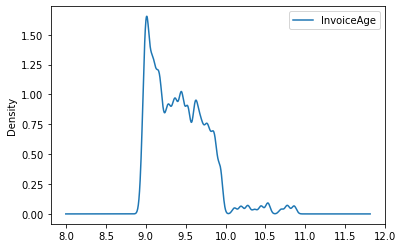

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
df_train['InvoiceAge'].plot(kind='kde', ax=ax)
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

<AxesSubplot:>

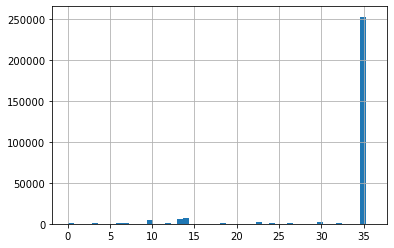

In [16]:
df_train.Country.hist(bins=50)

<AxesSubplot:xlabel='InvoiceAge'>

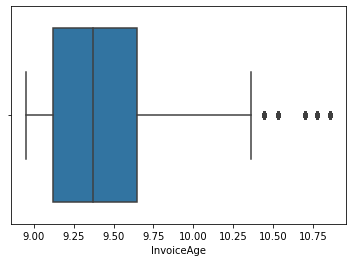

In [17]:
import seaborn as sns
sns.boxplot('InvoiceAge',data=df_train)

<AxesSubplot:xlabel='Invoice_Stock_Description'>

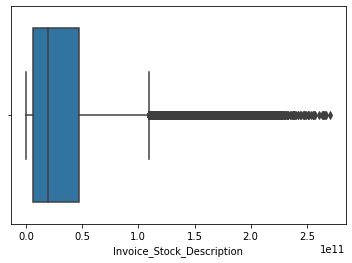

In [18]:
sns.boxplot('Invoice_Stock_Description',data=df_train)

#### Many Outliers

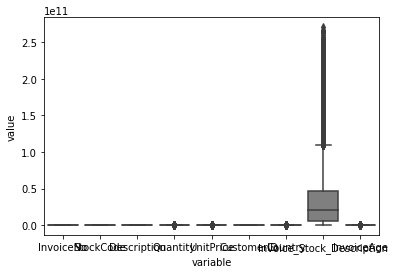

In [21]:
df =df_train.copy()
df = df_train.drop('InvoiceDate', 1)
sns.boxplot(x="variable", y="value", data=pd.melt(df))

plt.show()

### Compute the frequency with every feature

In [23]:
#df['InvoiceNo'].value_counts().plot.bar()

<AxesSubplot:>

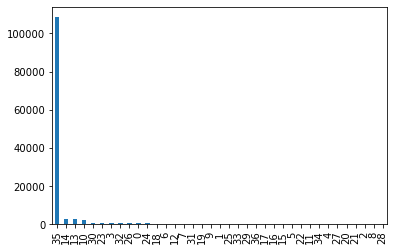

In [24]:
df_test['Country'].value_counts().plot.bar()

In [26]:
df_train['weekday']=df_train['InvoiceDate'].dt.day_name()
df_train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Stock_Description,InvoiceAge,weekday
0,6141,1583,144,3,2011-06-05,3.75,14056,35,1399853232,9.465182,Sunday
1,6349,1300,3682,6,2011-11-05,1.95,13098,35,30390123400,9.046282,Saturday
2,16783,2178,1939,4,2011-11-20,5.95,15044,35,70876992186,9.005213,Sunday
3,16971,2115,2983,1,2011-11-22,0.83,15525,35,107070802695,8.999737,Tuesday
4,6080,1210,2886,12,2011-06-05,1.65,13952,35,21231724800,9.465182,Sunday


In [28]:
df_test['weekday']=df_test['InvoiceDate'].dt.day_name()
df_test.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country,Invoice_Stock_Description,InvoiceAge,weekday
0,3139,1709,1079,3,2011-02-22 15:22:00,16161,35,5788350529,9.745433,Tuesday
1,617,510,3457,1,2010-08-12 12:46:00,17341,35,1087814190,10.276883,Thursday
2,14653,604,694,36,2011-10-25 13:53:00,15158,35,6142185928,9.074815,Tuesday
3,8634,1478,3473,2,2011-06-27 12:38:00,16033,35,44319133596,9.403506,Monday
4,15546,3216,871,1,2011-06-11 16:14:00,15351,35,43546460256,9.446902,Saturday


<AxesSubplot:>

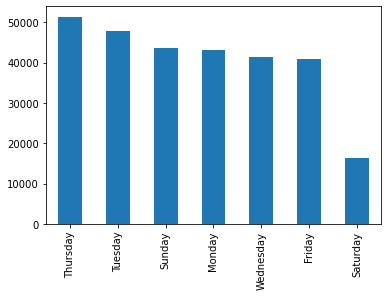

In [29]:
df_train['weekday'].value_counts().plot.bar()

<AxesSubplot:>

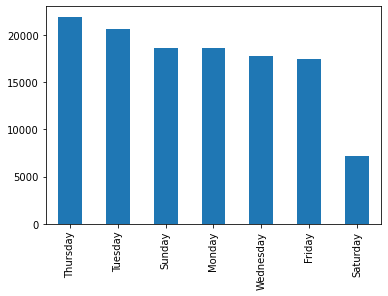

In [30]:
df_test['weekday'].value_counts().plot.bar()

###  MOst sales happens in thrusday and least on saturday

#### Accordingly encoding the days as per the frequency

In [31]:
dictionary={'Monday':4,'Tuesday':6,'Wednesday':3,'Thursday':7,'Friday':2,'Saturday':1,'Sunday':5}

In [32]:
dictionary

{'Monday': 4,
 'Tuesday': 6,
 'Wednesday': 3,
 'Thursday': 7,
 'Friday': 2,
 'Saturday': 1,
 'Sunday': 5}

In [33]:
df_train['weekday_ordinal']=df_train['weekday'].map(dictionary)

In [34]:
df_test['weekday_ordinal']=df_test['weekday'].map(dictionary)

In [35]:
df_train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Stock_Description,InvoiceAge,weekday,weekday_ordinal
0,6141,1583,144,3,2011-06-05,3.75,14056,35,1399853232,9.465182,Sunday,5
1,6349,1300,3682,6,2011-11-05,1.95,13098,35,30390123400,9.046282,Saturday,1
2,16783,2178,1939,4,2011-11-20,5.95,15044,35,70876992186,9.005213,Sunday,5
3,16971,2115,2983,1,2011-11-22,0.83,15525,35,107070802695,8.999737,Tuesday,6
4,6080,1210,2886,12,2011-06-05,1.65,13952,35,21231724800,9.465182,Sunday,5


###  Changing the country column to factor

In [36]:
df_train['Country'] = df_train['Country'].astype(object)

In [37]:
df_test['Country'] = df_test['Country'].astype(object)

In [38]:
for feature in df_train.columns[:]:
    print(feature,":",len(df_train[feature].unique()),'labels')

InvoiceNo : 20971 labels
StockCode : 3619 labels
Description : 3819 labels
Quantity : 373 labels
InvoiceDate : 305 labels
UnitPrice : 524 labels
CustomerID : 4339 labels
Country : 37 labels
Invoice_Stock_Description : 279526 labels
InvoiceAge : 305 labels
weekday : 7 labels
weekday_ordinal : 7 labels


In [39]:
for feature in df_test.columns[:]:
    print(feature,":",len(df_test[feature].unique()),'labels')

InvoiceNo : 18204 labels
StockCode : 3410 labels
Description : 3563 labels
Quantity : 274 labels
InvoiceDate : 17029 labels
CustomerID : 4226 labels
Country : 37 labels
Invoice_Stock_Description : 121025 labels
InvoiceAge : 17029 labels
weekday : 7 labels
weekday_ordinal : 7 labels


In [41]:
country_map=df_train['Country'].value_counts().to_dict()
country_map

{35: 253253,
 14: 6653,
 13: 5946,
 10: 5244,
 30: 1776,
 23: 1680,
 3: 1435,
 32: 1293,
 26: 1049,
 0: 883,
 24: 766,
 18: 561,
 6: 537,
 12: 489,
 7: 424,
 31: 325,
 1: 303,
 9: 273,
 25: 244,
 19: 238,
 33: 210,
 17: 185,
 36: 171,
 29: 152,
 16: 132,
 5: 106,
 15: 101,
 22: 89,
 34: 52,
 27: 47,
 11: 40,
 20: 34,
 8: 26,
 21: 25,
 4: 20,
 2: 10,
 28: 8}

#### Frequency encoding of country

In [42]:
df_train['Country']=df_train['Country'].map(country_map)
df_train.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Stock_Description,InvoiceAge,weekday,weekday_ordinal
0,6141,1583,144,3,2011-06-05,3.75,14056,253253,1399853232,9.465182,Sunday,5
1,6349,1300,3682,6,2011-11-05,1.95,13098,253253,30390123400,9.046282,Saturday,1
2,16783,2178,1939,4,2011-11-20,5.95,15044,253253,70876992186,9.005213,Sunday,5
3,16971,2115,2983,1,2011-11-22,0.83,15525,253253,107070802695,8.999737,Tuesday,6
4,6080,1210,2886,12,2011-06-05,1.65,13952,253253,21231724800,9.465182,Sunday,5
5,17388,495,3247,5,2011-11-27,1.65,15351,253253,27947123820,8.986048,Sunday,5
6,18494,165,3377,1,2011-08-12,1.25,12748,253253,10304949270,9.279004,Friday,2
7,17109,2597,3435,1,2011-11-23,1.25,16255,253253,152624170755,8.996999,Wednesday,3
8,17143,1945,2352,1,2011-11-23,5.75,17841,253253,78423053520,8.996999,Wednesday,3
9,8422,3311,2502,6,2011-06-22,2.95,13849,253253,69768875484,9.418637,Wednesday,3


In [43]:
df_test['Country']=df_test['Country'].map(country_map)
df_test.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country,Invoice_Stock_Description,InvoiceAge,weekday,weekday_ordinal
0,3139,1709,1079,3,2011-02-22 15:22:00,16161,253253,5788350529,9.745433,Tuesday,6
1,617,510,3457,1,2010-08-12 12:46:00,17341,253253,1087814190,10.276883,Thursday,7
2,14653,604,694,36,2011-10-25 13:53:00,15158,253253,6142185928,9.074815,Tuesday,6
3,8634,1478,3473,2,2011-06-27 12:38:00,16033,253253,44319133596,9.403506,Monday,4
4,15546,3216,871,1,2011-06-11 16:14:00,15351,253253,43546460256,9.446902,Saturday,1
5,8348,1817,697,48,2011-06-20 13:27:00,12432,766,10572316252,9.422579,Monday,4
6,17034,262,3147,18,2011-11-22 16:26:00,13985,253253,14044771476,8.997863,Tuesday,6
7,3701,1323,2000,7,2011-08-03 17:23:00,14507,253253,9792846000,9.301662,Wednesday,3
8,16983,2327,1121,6,2011-11-22 12:52:00,15150,253253,44301293361,8.998269,Tuesday,6
9,14396,2216,1912,4,2011-10-20 13:24:00,14911,5244,60995736832,9.088560,Thursday,7


In [46]:
customerid_map=df_train['CustomerID'].value_counts().to_dict()
InvoiceNo_map=df_train['InvoiceNo'].value_counts().to_dict()
StockCode_map=df_train['StockCode'].value_counts().to_dict()
Quantity_map=df_train['Quantity'].value_counts().to_dict()
InvoiceDate_map=df_train['InvoiceDate'].value_counts().to_dict()

In [47]:
customerid_map_test=df_test['CustomerID'].value_counts().to_dict()
InvoiceNo_map_test=df_test['InvoiceNo'].value_counts().to_dict()
StockCode_map_test=df_test['StockCode'].value_counts().to_dict()
Quantity_map_test=df_test['Quantity'].value_counts().to_dict()
InvoiceDate_map_test=df_test['InvoiceDate'].value_counts().to_dict()

In [48]:
df_train['CustomerID_freq']=df_train['CustomerID'].map(customerid_map)
df_train['InvoiceNo_freq']=df_train['InvoiceNo'].map(InvoiceNo_map)
df_train['StockCode_freq']=df_train['StockCode'].map(StockCode_map)
df_train['Quantity_freq']=df_train['Quantity'].map(Quantity_map)
df_train['InvoiceDate_freq']=df_train['InvoiceDate'].map(InvoiceDate_map)

In [49]:
df_test['CustomerID_freq']=df_test['CustomerID'].map(customerid_map_test)
df_test['InvoiceNo_freq']=df_test['InvoiceNo'].map(InvoiceNo_map_test)
df_test['StockCode_freq']=df_test['StockCode'].map(StockCode_map_test)
df_test['Quantity_freq']=df_test['Quantity'].map(Quantity_map_test)
df_test['InvoiceDate_freq']=df_test['InvoiceDate'].map(InvoiceDate_map_test)

In [50]:
df_train.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Stock_Description,InvoiceAge,weekday,weekday_ordinal,CustomerID_freq,InvoiceNo_freq,StockCode_freq,Quantity_freq,InvoiceDate_freq
0,6141,1583,144,3,2011-06-05,3.75,14056,253253,1399853232,9.465182,Sunday,5,791,34,331,18794,901
1,6349,1300,3682,6,2011-11-05,1.95,13098,253253,30390123400,9.046282,Saturday,1,394,27,194,26375,1030
2,16783,2178,1939,4,2011-11-20,5.95,15044,253253,70876992186,9.005213,Sunday,5,307,41,317,22609,2190
3,16971,2115,2983,1,2011-11-22,0.83,15525,253253,107070802695,8.999737,Tuesday,6,128,28,328,51253,1999
4,6080,1210,2886,12,2011-06-05,1.65,13952,253253,21231724800,9.465182,Sunday,5,95,30,114,42076,901


In [51]:
df_test.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country,Invoice_Stock_Description,InvoiceAge,weekday,weekday_ordinal,CustomerID_freq,InvoiceNo_freq,StockCode_freq,Quantity_freq,InvoiceDate_freq
0,3139,1709,1079,3,2011-02-22 15:22:00,16161,253253,5788350529,9.745433,Tuesday,6,151,11,14,8154,12
1,617,510,3457,1,2010-08-12 12:46:00,17341,253253,1087814190,10.276883,Thursday,7,45,38,17,22061,38
2,14653,604,694,36,2011-10-25 13:53:00,15158,253253,6142185928,9.074815,Tuesday,6,4,4,99,1160,4
3,8634,1478,3473,2,2011-06-27 12:38:00,16033,253253,44319133596,9.403506,Monday,4,342,24,156,17282,24
4,15546,3216,871,1,2011-06-11 16:14:00,15351,253253,43546460256,9.446902,Saturday,1,66,8,146,22061,8


### Mean Encoding

In [52]:
mean_Country_ordinal=df_train.groupby(['Country'])['UnitPrice'].mean().to_dict()

In [53]:
mean_Country_ordinal

{8: 1.95875,
 10: 4.389999999999999,
 20: 4.413,
 25: 2.8256000000000006,
 26: 2.955769230769231,
 34: 6.126470588235294,
 40: 4.676249999999998,
 47: 4.5457446808510635,
 52: 3.108269230769231,
 89: 5.6752808988764,
 101: 5.622772277227724,
 106: 2.231603773584905,
 132: 2.7199242424242436,
 152: 108.94243421052639,
 171: 3.4243859649122816,
 185: 4.1009189189189215,
 210: 2.2219999999999978,
 238: 2.34373949579832,
 244: 4.159426229508205,
 273: 3.3117216117216133,
 303: 4.387854785478555,
 325: 3.800615384615388,
 424: 6.366297169811311,
 489: 5.6003271983640115,
 537: 5.135139664804472,
 561: 4.275757575757572,
 766: 6.45878590078327,
 883: 3.04927519818799,
 1049: 8.869094375595788,
 1293: 3.405893271461704,
 1435: 3.632717770034824,
 1680: 2.6441130952380805,
 1776: 5.450782657657671,
 5244: 4.798705186880368,
 5946: 5.6377379751094265,
 6653: 3.963541259582226,
 253253: 3.239282551438512}

In [55]:
df_train['mean_Country_ordinal_encode']=df_train['Country'].map(mean_Country_ordinal)
df_train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Stock_Description,InvoiceAge,weekday,weekday_ordinal,CustomerID_freq,InvoiceNo_freq,StockCode_freq,Quantity_freq,InvoiceDate_freq,mean_Country_ordinal_encode
0,6141,1583,144,3,2011-06-05,3.75,14056,253253,1399853232,9.465182,Sunday,5,791,34,331,18794,901,3.239283
1,6349,1300,3682,6,2011-11-05,1.95,13098,253253,30390123400,9.046282,Saturday,1,394,27,194,26375,1030,3.239283
2,16783,2178,1939,4,2011-11-20,5.95,15044,253253,70876992186,9.005213,Sunday,5,307,41,317,22609,2190,3.239283
3,16971,2115,2983,1,2011-11-22,0.83,15525,253253,107070802695,8.999737,Tuesday,6,128,28,328,51253,1999,3.239283
4,6080,1210,2886,12,2011-06-05,1.65,13952,253253,21231724800,9.465182,Sunday,5,95,30,114,42076,901,3.239283


In [56]:
mean_InvoiceNo_ordinal=df_train.groupby(['InvoiceNo'])['UnitPrice'].mean().to_dict()
mean_StockCode_ordinal=df_train.groupby(['StockCode'])['UnitPrice'].mean().to_dict()
mean_Description_ordinal=df_train.groupby(['Description'])['UnitPrice'].mean().to_dict()
mean_InvoiceDate_ordinal=df_train.groupby(['InvoiceDate'])['UnitPrice'].mean().to_dict()
mean_CustomerID_ordinal=df_train.groupby(['CustomerID'])['UnitPrice'].mean().to_dict()

In [81]:
mean_Invoice_Stock_Description_ordinal=df_train.groupby(['Invoice_Stock_Description'])['UnitPrice'].mean().to_dict()

In [57]:
df_train['mean_InvoiceNo_ordinal_encode']=df_train['InvoiceNo'].map(mean_InvoiceNo_ordinal)
df_train['mean_StockCode_ordinal_encode']=df_train['StockCode'].map(mean_StockCode_ordinal)
df_train['mean_Description_ordinal_encode']=df_train['Description'].map(mean_Description_ordinal)
df_train['mean_InvoiceDate_ordinal_encode']=df_train['InvoiceDate'].map(mean_InvoiceDate_ordinal)
df_train['mean_CustomerID_ordinal_encode']=df_train['CustomerID'].map(mean_CustomerID_ordinal)

In [82]:
df_train['mean_Invoice_Stock_Description_encode']=df_train['Invoice_Stock_Description'].map(mean_Invoice_Stock_Description_ordinal)

In [83]:
df_train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Stock_Description,InvoiceAge,...,StockCode_freq,Quantity_freq,InvoiceDate_freq,mean_Country_ordinal_encode,mean_InvoiceNo_ordinal_encode,mean_StockCode_ordinal_encode,mean_Description_ordinal_encode,mean_InvoiceDate_ordinal_encode,mean_CustomerID_ordinal_encode,mean_Invoice_Stock_Description_encode
0,6141,1583,144,3,2011-06-05,3.75,14056,253253,1399853232,9.465182,...,331,18794,901,3.239283,3.241765,3.745770,3.745770,2.939234,2.795714,3.75
1,6349,1300,3682,6,2011-11-05,1.95,13098,253253,30390123400,9.046282,...,194,26375,1030,3.239283,3.028519,1.972887,1.972887,3.307942,2.917792,1.95
2,16783,2178,1939,4,2011-11-20,5.95,15044,253253,70876992186,9.005213,...,317,22609,2190,3.239283,3.824634,5.896372,5.896372,2.573858,4.957427,5.95
3,16971,2115,2983,1,2011-11-22,0.83,15525,253253,107070802695,8.999737,...,328,51253,1999,3.239283,1.532857,0.824970,0.824970,2.756038,2.888281,0.83
4,6080,1210,2886,12,2011-06-05,1.65,13952,253253,21231724800,9.465182,...,114,42076,901,3.239283,3.426000,1.635965,1.635965,2.939234,3.778221,1.65


In [89]:
df_train.isnull().sum()

InvoiceNo                                0
StockCode                                0
Description                              0
Quantity                                 0
InvoiceDate                              0
UnitPrice                                0
CustomerID                               0
Country                                  0
Invoice_Stock_Description                0
InvoiceAge                               0
weekday                                  0
weekday_ordinal                          0
CustomerID_freq                          0
InvoiceNo_freq                           0
StockCode_freq                           0
Quantity_freq                            0
InvoiceDate_freq                         0
mean_Country_ordinal_encode              0
mean_InvoiceNo_ordinal_encode            0
mean_StockCode_ordinal_encode            0
mean_Description_ordinal_encode          0
mean_InvoiceDate_ordinal_encode          0
mean_CustomerID_ordinal_encode           0
mean_Invoic

In [76]:
df_test['mean_InvoiceNo_ordinal_encode']=df_test['InvoiceNo'].map(mean_InvoiceNo_ordinal)
df_test['mean_StockCode_ordinal_encode']=df_test['StockCode'].map(mean_StockCode_ordinal)
df_test['mean_Description_ordinal_encode']=df_test['Description'].map(mean_Description_ordinal)
df_test['mean_InvoiceDate_ordinal_encode']=df_test['InvoiceDate'].map(mean_InvoiceDate_ordinal)
df_test['mean_CustomerID_ordinal_encode']=df_test['CustomerID'].map(mean_CustomerID_ordinal)

In [84]:
df_test['mean_Invoice_Stock_Description_encode']=df_test['Invoice_Stock_Description'].map(mean_Invoice_Stock_Description_ordinal)

In [79]:
df_test['mean_Country_ordinal_encode']=df_test['Country'].map(mean_Country_ordinal)

In [85]:
df_test.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country,Invoice_Stock_Description,InvoiceAge,weekday,...,StockCode_freq,Quantity_freq,InvoiceDate_freq,mean_InvoiceNo_ordinal_encode,mean_StockCode_ordinal_encode,mean_Description_ordinal_encode,mean_InvoiceDate_ordinal_encode,mean_CustomerID_ordinal_encode,mean_Country_ordinal_encode,mean_Invoice_Stock_Description_encode
0,3139,1709,1079,3,2011-02-22,16161,253253,5788350529,9.745433,Tuesday,...,14,8154,12,3.548125,1.650000,1.650000,3.026849,3.430627,3.239283,NaN
1,617,510,3457,1,2010-08-12,17341,253253,1087814190,10.276883,Thursday,...,17,22061,38,2.128130,1.193421,1.193421,3.115537,2.082536,3.239283,NaN
2,14653,604,694,36,2011-10-25,15158,253253,6142185928,9.074815,Tuesday,...,99,1160,4,1.820000,3.867050,3.867050,2.500251,1.820000,3.239283,NaN
3,8634,1478,3473,2,2011-06-27,16033,253253,44319133596,9.403506,Monday,...,156,17282,24,3.000000,1.641111,1.641111,2.691968,3.414272,3.239283,NaN
4,15546,3216,871,1,2011-06-11,15351,253253,43546460256,9.446902,Saturday,...,146,22061,8,3.849524,12.610985,12.610985,2.763445,2.926886,3.239283,NaN


In [86]:
df_test['mean_Invoice_Stock_Description_encode'].describe()

count    4319.000000
mean        3.201695
std        38.258219
min         0.000000
25%         0.850000
50%         1.650000
75%         2.950000
max      2118.740000
Name: mean_Invoice_Stock_Description_encode, dtype: float64

In [87]:
df_test['mean_Invoice_Stock_Description_encode'].fillna(df_test.mean_Invoice_Stock_Description_encode.median(),inplace=True)

In [88]:
df_test.isnull().sum()

InvoiceNo                                   0
StockCode                                   0
Description                                 0
Quantity                                    0
InvoiceDate                                 0
CustomerID                                  0
Country                                     0
Invoice_Stock_Description                   0
InvoiceAge                                  0
weekday                                     0
weekday_ordinal                             0
CustomerID_freq                             0
InvoiceNo_freq                              0
StockCode_freq                              0
Quantity_freq                               0
InvoiceDate_freq                            0
mean_InvoiceNo_ordinal_encode            1441
mean_StockCode_ordinal_encode              91
mean_Description_ordinal_encode           104
mean_InvoiceDate_ordinal_encode             0
mean_CustomerID_ordinal_encode             41
mean_Country_ordinal_encode       

In [92]:
df_test['mean_InvoiceNo_ordinal_encode'].fillna(df_test.mean_InvoiceNo_ordinal_encode.median(),inplace=True)
df_test['mean_StockCode_ordinal_encode'].fillna(df_test.mean_StockCode_ordinal_encode.median(),inplace=True)
df_test['mean_Description_ordinal_encode'].fillna(df_test.mean_Description_ordinal_encode.median(),inplace=True)
df_test['mean_CustomerID_ordinal_encode'].fillna(df_test.mean_CustomerID_ordinal_encode.median(),inplace=True)

In [93]:
df_test.isnull().sum()

InvoiceNo                                0
StockCode                                0
Description                              0
Quantity                                 0
InvoiceDate                              0
CustomerID                               0
Country                                  0
Invoice_Stock_Description                0
InvoiceAge                               0
weekday                                  0
weekday_ordinal                          0
CustomerID_freq                          0
InvoiceNo_freq                           0
StockCode_freq                           0
Quantity_freq                            0
InvoiceDate_freq                         0
mean_InvoiceNo_ordinal_encode            0
mean_StockCode_ordinal_encode            0
mean_Description_ordinal_encode          0
mean_InvoiceDate_ordinal_encode          0
mean_CustomerID_ordinal_encode           0
mean_Country_ordinal_encode              0
mean_Invoice_Stock_Description_encode    0
dtype: int6

In [94]:
df_train.to_csv('train_feature_engineered.csv', index=False)
df_test.to_csv('test_feature_engineered.csv', index=False)

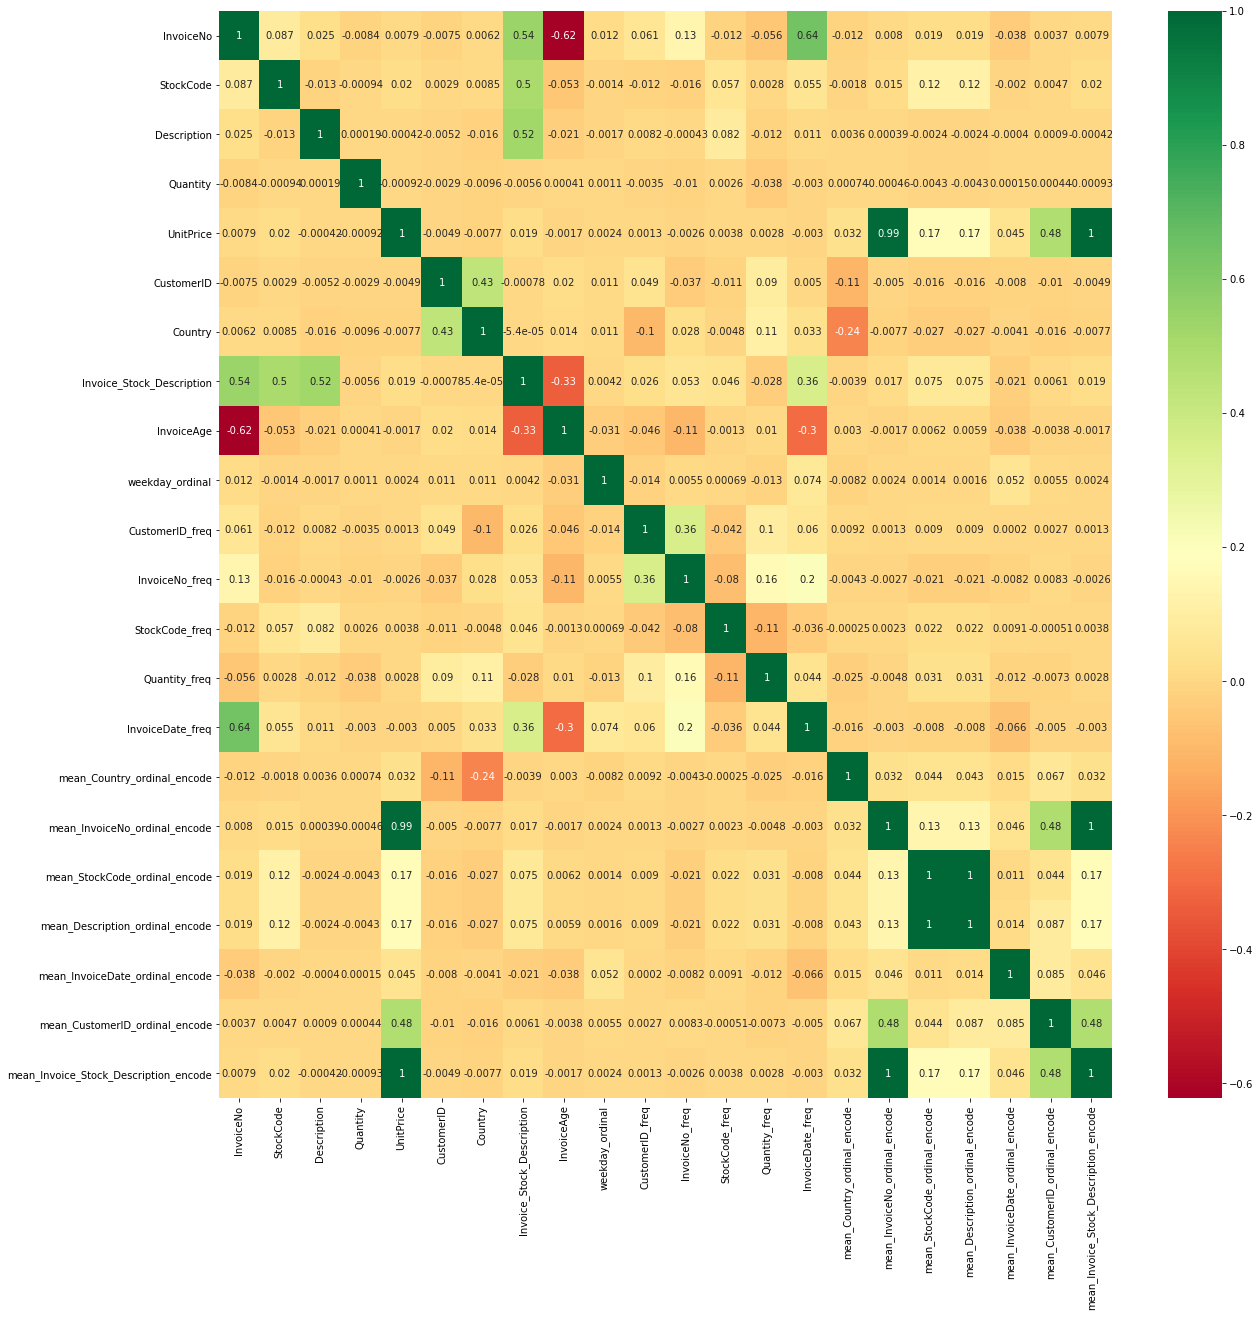

In [127]:
#get correlations of each features in dataset
corrmat = df_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Standardising

In [78]:
#### standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler

In [96]:
df_train.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Invoice_Stock_Description',
       'InvoiceAge', 'weekday', 'weekday_ordinal', 'CustomerID_freq',
       'InvoiceNo_freq', 'StockCode_freq', 'Quantity_freq', 'InvoiceDate_freq',
       'mean_Country_ordinal_encode', 'mean_InvoiceNo_ordinal_encode',
       'mean_StockCode_ordinal_encode', 'mean_Description_ordinal_encode',
       'mean_InvoiceDate_ordinal_encode', 'mean_CustomerID_ordinal_encode',
       'mean_Invoice_Stock_Description_encode'],
      dtype='object')

In [97]:
df_test.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'CustomerID', 'Country', 'Invoice_Stock_Description', 'InvoiceAge',
       'weekday', 'weekday_ordinal', 'CustomerID_freq', 'InvoiceNo_freq',
       'StockCode_freq', 'Quantity_freq', 'InvoiceDate_freq',
       'mean_InvoiceNo_ordinal_encode', 'mean_StockCode_ordinal_encode',
       'mean_Description_ordinal_encode', 'mean_InvoiceDate_ordinal_encode',
       'mean_CustomerID_ordinal_encode', 'mean_Country_ordinal_encode',
       'mean_Invoice_Stock_Description_encode'],
      dtype='object')

In [98]:
df_train= df_train.drop(['InvoiceDate'],1)
df_test= df_test.drop(['InvoiceDate'],1)

In [100]:
df_train1 = df_train.drop(['weekday'],1)
df_test1 = df_test.drop(['weekday'],1)


In [102]:
df_train1.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Invoice_Stock_Description,InvoiceAge,weekday_ordinal,...,StockCode_freq,Quantity_freq,InvoiceDate_freq,mean_Country_ordinal_encode,mean_InvoiceNo_ordinal_encode,mean_StockCode_ordinal_encode,mean_Description_ordinal_encode,mean_InvoiceDate_ordinal_encode,mean_CustomerID_ordinal_encode,mean_Invoice_Stock_Description_encode
0,6141,1583,144,3,3.75,14056,253253,1399853232,9.465182,5,...,331,18794,901,3.239283,3.241765,3.745770,3.745770,2.939234,2.795714,3.75
1,6349,1300,3682,6,1.95,13098,253253,30390123400,9.046282,1,...,194,26375,1030,3.239283,3.028519,1.972887,1.972887,3.307942,2.917792,1.95
2,16783,2178,1939,4,5.95,15044,253253,70876992186,9.005213,5,...,317,22609,2190,3.239283,3.824634,5.896372,5.896372,2.573858,4.957427,5.95
3,16971,2115,2983,1,0.83,15525,253253,107070802695,8.999737,6,...,328,51253,1999,3.239283,1.532857,0.824970,0.824970,2.756038,2.888281,0.83
4,6080,1210,2886,12,1.65,13952,253253,21231724800,9.465182,5,...,114,42076,901,3.239283,3.426000,1.635965,1.635965,2.939234,3.778221,1.65


In [104]:
df_train1.dtypes

InvoiceNo                                  int64
StockCode                                  int64
Description                                int64
Quantity                                   int64
UnitPrice                                float64
CustomerID                                 int64
Country                                    int64
Invoice_Stock_Description                  int64
InvoiceAge                               float64
weekday_ordinal                            int64
CustomerID_freq                            int64
InvoiceNo_freq                             int64
StockCode_freq                             int64
Quantity_freq                              int64
InvoiceDate_freq                           int64
mean_Country_ordinal_encode              float64
mean_InvoiceNo_ordinal_encode            float64
mean_StockCode_ordinal_encode            float64
mean_Description_ordinal_encode          float64
mean_InvoiceDate_ordinal_encode          float64
mean_CustomerID_ordi

In [105]:
df_test1.dtypes

InvoiceNo                                  int64
StockCode                                  int64
Description                                int64
Quantity                                   int64
CustomerID                                 int64
Country                                    int64
Invoice_Stock_Description                  int64
InvoiceAge                               float64
weekday_ordinal                            int64
CustomerID_freq                            int64
InvoiceNo_freq                             int64
StockCode_freq                             int64
Quantity_freq                              int64
InvoiceDate_freq                           int64
mean_InvoiceNo_ordinal_encode            float64
mean_StockCode_ordinal_encode            float64
mean_Description_ordinal_encode          float64
mean_InvoiceDate_ordinal_encode          float64
mean_CustomerID_ordinal_encode           float64
mean_Country_ordinal_encode              float64
mean_Invoice_Stock_D

In [107]:
scaler=StandardScaler()
### fit vs fit_transform
df_train_scaled=scaler.fit_transform(df_train1)

In [108]:
df_train_scaled

array([[-6.87091350e-01,  1.13953919e-02, -1.72503032e+00, ...,
        -1.43672925e-01, -1.74585510e-02,  3.81932069e-03],
       [-6.49624062e-01, -3.24070258e-01,  1.52140665e+00, ...,
        -4.02057651e-02, -1.42071511e-02, -1.91898597e-02],
       [ 1.22986479e+00,  7.16703031e-01, -7.79544691e-02, ...,
        -2.46205104e-01,  4.01162373e-02,  3.19416522e-02],
       ...,
       [-5.97025755e-01, -1.07442275e+00,  1.47552710e+00, ...,
        -6.61762797e-02,  1.31250620e-02,  6.45379910e-02],
       [ 6.96136068e-01,  3.09765501e-03,  9.77275183e-01, ...,
        -1.38469436e-01, -7.57743384e-03, -1.55427012e-05],
       [ 1.95731618e-01,  1.22049420e+00, -7.96428223e-01, ...,
        -1.71387590e-01, -5.41722722e-02, -3.45293132e-02]])

(array([12489., 10865., 13548., 12835., 19343., 21938., 17959., 24073.,
        28142., 21925., 16125., 29869.,  9211.,  3314.,  9548., 10759.,
         6289., 13073.,  1505.,  1970.]),
 array([-1.86507854, -1.64678879, -1.42849904, -1.21020929, -0.99191954,
        -0.77362979, -0.55534004, -0.33705029, -0.11876054,  0.09952921,
         0.31781896,  0.53610871,  0.75439846,  0.97268821,  1.19097797,
         1.40926772,  1.62755747,  1.84584722,  2.06413697,  2.28242672,
         2.50071647]),
 <BarContainer object of 20 artists>)

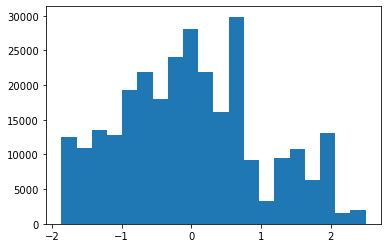

In [109]:
plt.hist(df_train_scaled[:,1],bins=20)

(array([15442., 10153.,  9304., 15403.,  8841., 13828., 11168., 11564.,
        17907., 20363., 16206., 15600.,  9737., 15761., 20247., 20875.,
        10831., 15987., 10260., 15303.]),
 array([-1.85716342, -1.67846257, -1.49976173, -1.32106088, -1.14236003,
        -0.96365918, -0.78495834, -0.60625749, -0.42755664, -0.24885579,
        -0.07015495,  0.1085459 ,  0.28724675,  0.4659476 ,  0.64464844,
         0.82334929,  1.00205014,  1.18075099,  1.35945183,  1.53815268,
         1.71685353]),
 <BarContainer object of 20 artists>)

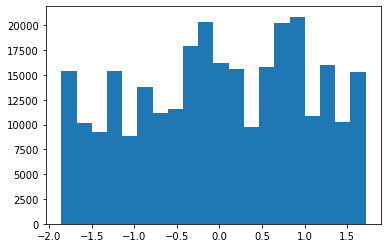

In [110]:
plt.hist(df_train_scaled[:,2],bins=20)

(array([284780.]),
 array([-4.40209459e-02,  4.97026088e+02]),
 <BarContainer object of 1 artists>)

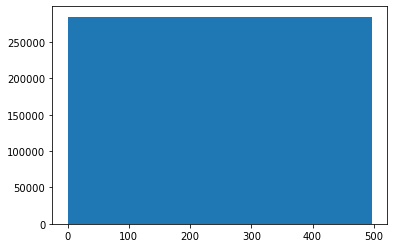

In [125]:
plt.hist(df_train_scaled[:,4],bins =1)

In [128]:
import scipy.stats as stat
import pylab 

In [129]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

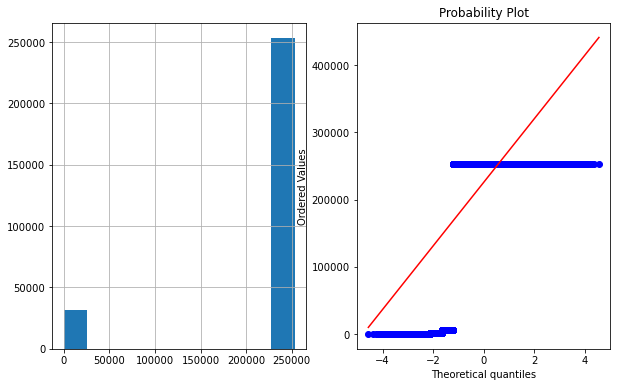

In [130]:
plot_data(df_train,'Country')

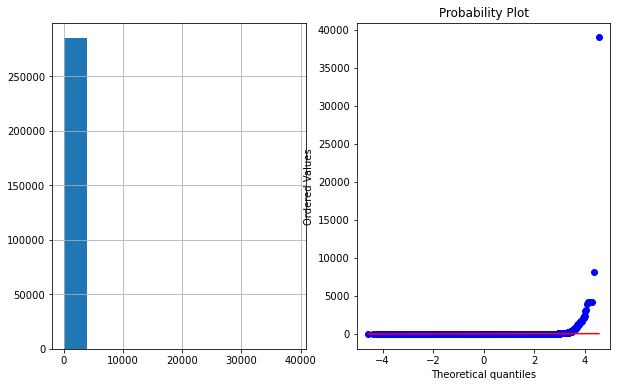

In [131]:
plot_data(df_train,'UnitPrice')

### Feature Selection

### Univariate Selection

In [133]:
df_train.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice',
       'CustomerID', 'Country', 'Invoice_Stock_Description', 'InvoiceAge',
       'weekday', 'weekday_ordinal', 'CustomerID_freq', 'InvoiceNo_freq',
       'StockCode_freq', 'Quantity_freq', 'InvoiceDate_freq',
       'mean_Country_ordinal_encode', 'mean_InvoiceNo_ordinal_encode',
       'mean_StockCode_ordinal_encode', 'mean_Description_ordinal_encode',
       'mean_InvoiceDate_ordinal_encode', 'mean_CustomerID_ordinal_encode',
       'mean_Invoice_Stock_Description_encode'],
      dtype='object')

In [156]:
cols = [col for col in df_train.columns if col not in ['UnitPrice','weekday']]
cols

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'CustomerID',
 'Country',
 'Invoice_Stock_Description',
 'InvoiceAge',
 'weekday_ordinal',
 'CustomerID_freq',
 'InvoiceNo_freq',
 'StockCode_freq',
 'Quantity_freq',
 'InvoiceDate_freq',
 'mean_Country_ordinal_encode',
 'mean_InvoiceNo_ordinal_encode',
 'mean_StockCode_ordinal_encode',
 'mean_Description_ordinal_encode',
 'mean_InvoiceDate_ordinal_encode',
 'mean_CustomerID_ordinal_encode',
 'mean_Invoice_Stock_Description_encode']

In [157]:
X=df_train[cols]
y=df_train['UnitPrice']

In [152]:
X.head()

,InvoiceNo,StockCode,Description,CustomerID,Country,Invoice_Stock_Description,InvoiceAge,weekday_ordinal,CustomerID_freq,InvoiceNo_freq,StockCode_freq,Quantity_freq,InvoiceDate_freq,mean_Country_ordinal_encode,mean_InvoiceNo_ordinal_encode,mean_StockCode_ordinal_encode,mean_Description_ordinal_encode,mean_InvoiceDate_ordinal_encode,mean_CustomerID_ordinal_encode,mean_Invoice_Stock_Description_encode
0,6141,1583,144,14056,253253,1399853232,9.465182,5,791,34,331,18794,901,3.239283,3.241765,3.745770,3.745770,2.939234,2.795714,3.75
1,6349,1300,3682,13098,253253,30390123400,9.046282,1,394,27,194,26375,1030,3.239283,3.028519,1.972887,1.972887,3.307942,2.917792,1.95
2,16783,2178,1939,15044,253253,70876992186,9.005213,5,307,41,317,22609,2190,3.239283,3.824634,5.896372,5.896372,2.573858,4.957427,5.95
3,16971,2115,2983,15525,253253,107070802695,8.999737,6,128,28,328,51253,1999,3.239283,1.532857,0.824970,0.824970,2.756038,2.888281,0.83
4,6080,1210,2886,13952,253253,21231724800,9.465182,5,95,30,114,42076,901,3.239283,3.426000,1.635965,1.635965,2.939234,3.778221,1.65


In [153]:
y.head()

0    3.75
1    1.95
2    5.95
3    0.83
4    1.65
Name: UnitPrice, dtype: float64

In [145]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [146]:
df_train.shape

(284780, 23)

In [149]:
# Check for columns which are having negative columns
X.columns[(X < 0).any()].tolist()

['Quantity']

#### Quantity has negative values

In [150]:
cols = [col for col in df_train.columns if col not in ['UnitPrice','weekday','Quantity']]
X=df_train[cols]
y=df_train['UnitPrice']

In [155]:
### Apply SelectKBest Algorithm
#ordered_rank_features=SelectKBest(score_func=chi2,k=20)
'''
ordered_feature=ordered_rank_features.fit(X,y)
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)
features_rank=pd.concat([dfcolumns,dfscores],axis=1)
features_rank.columns=['Features','Score']
features_rank
'''

'\nordered_feature=ordered_rank_features.fit(X,y)\ndfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])\ndfcolumns=pd.DataFrame(X.columns)\nfeatures_rank=pd.concat([dfcolumns,dfscores],axis=1)\nfeatures_rank.columns=[\'Features\',\'Score\']\nfeatures_rank\n'

### Feature Importance
This technique gives you a score for each feature of your data,the higher the score mor relevant it is

In [5]:
    df_train=pd.read_csv(r'train_feature_engineered.csv')
    df_test=pd.read_csv(r'test_feature_engineered.csv')

In [6]:
df_train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Stock_Description,InvoiceAge,...,StockCode_freq,Quantity_freq,InvoiceDate_freq,mean_Country_ordinal_encode,mean_InvoiceNo_ordinal_encode,mean_StockCode_ordinal_encode,mean_Description_ordinal_encode,mean_InvoiceDate_ordinal_encode,mean_CustomerID_ordinal_encode,mean_Invoice_Stock_Description_encode
0,6141,1583,144,3,2011-06-05,3.75,14056,253253,1399853232,9.465182,...,331,18794,901,3.239283,3.241765,3.745770,3.745770,2.939234,2.795714,3.75
1,6349,1300,3682,6,2011-11-05,1.95,13098,253253,30390123400,9.046282,...,194,26375,1030,3.239283,3.028519,1.972887,1.972887,3.307942,2.917792,1.95
2,16783,2178,1939,4,2011-11-20,5.95,15044,253253,70876992186,9.005213,...,317,22609,2190,3.239283,3.824634,5.896372,5.896372,2.573858,4.957427,5.95
3,16971,2115,2983,1,2011-11-22,0.83,15525,253253,107070802695,8.999737,...,328,51253,1999,3.239283,1.532857,0.824970,0.824970,2.756038,2.888281,0.83
4,6080,1210,2886,12,2011-06-05,1.65,13952,253253,21231724800,9.465182,...,114,42076,901,3.239283,3.426000,1.635965,1.635965,2.939234,3.778221,1.65


In [9]:
df_train.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Invoice_Stock_Description',
       'InvoiceAge', 'weekday', 'weekday_ordinal', 'CustomerID_freq',
       'InvoiceNo_freq', 'StockCode_freq', 'Quantity_freq', 'InvoiceDate_freq',
       'mean_Country_ordinal_encode', 'mean_InvoiceNo_ordinal_encode',
       'mean_StockCode_ordinal_encode', 'mean_Description_ordinal_encode',
       'mean_InvoiceDate_ordinal_encode', 'mean_CustomerID_ordinal_encode',
       'mean_Invoice_Stock_Description_encode'],
      dtype='object')

In [10]:
X=df_train.drop(['UnitPrice','InvoiceDate','weekday'], axis=1)
y=df_train['UnitPrice']

In [11]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [12]:
print(model.feature_importances_)

[4.19795223e-05 1.24948195e-03 4.29256238e-04 2.56034454e-05
 1.31580545e-04 9.33854317e-05 4.51923769e-04 3.73396365e-04
 7.00251343e-04 7.16935410e-05 2.12944742e-04 8.16168842e-04
 2.80112855e-05 2.97824083e-03 4.66999074e-05 5.24997055e-01
 1.18290313e-03 1.02694353e-03 6.99872015e-04 7.06917229e-05
 4.64371917e-01]


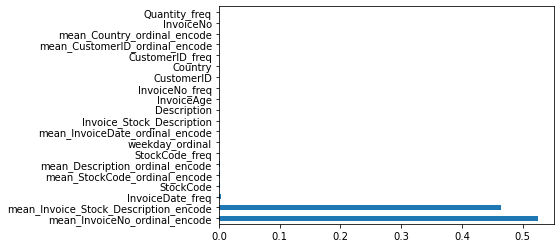

In [15]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [42]:
feat_importances_df= pd.DataFrame(feat_importances)
feat_importances_df.sort_values(0, ascending=False)

,0
mean_InvoiceNo_ordinal_encode,0.524997
mean_Invoice_Stock_Description_encode,0.464372
InvoiceDate_freq,0.002978
StockCode,0.001249
mean_StockCode_ordinal_encode,0.001183
mean_Description_ordinal_encode,0.001027
StockCode_freq,0.000816
weekday_ordinal,0.000700
mean_InvoiceDate_ordinal_encode,0.000700
Invoice_Stock_Description,0.000452


In [44]:
feat_importances_df.sort_values(0, ascending=False).index

Index(['mean_InvoiceNo_ordinal_encode',
       'mean_Invoice_Stock_Description_encode', 'InvoiceDate_freq',
       'StockCode', 'mean_StockCode_ordinal_encode',
       'mean_Description_ordinal_encode', 'StockCode_freq', 'weekday_ordinal',
       'mean_InvoiceDate_ordinal_encode', 'Invoice_Stock_Description',
       'Description', 'InvoiceAge', 'InvoiceNo_freq', 'CustomerID', 'Country',
       'CustomerID_freq', 'mean_CustomerID_ordinal_encode',
       'mean_Country_ordinal_encode', 'InvoiceNo', 'Quantity_freq',
       'Quantity'],
      dtype='object')

### Prediciton and selecting the Algorithm

### XGBoost Regressor

In [46]:
import xgboost
regressor=xgboost.XGBRegressor()

In [47]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

## Hyper Parameter Optimization
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [48]:
from sklearn.model_selection import GridSearchCV, KFold,RandomizedSearchCV

In [49]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [59]:
cols = ['mean_InvoiceNo_ordinal_encode',
       'mean_Invoice_Stock_Description_encode', 'InvoiceDate_freq',
       'StockCode', 'mean_StockCode_ordinal_encode',
       'mean_Description_ordinal_encode', 'StockCode_freq', 'weekday_ordinal',
       'mean_InvoiceDate_ordinal_encode', 'Invoice_Stock_Description',
       'Description', 'InvoiceAge', 'InvoiceNo_freq']
cols_remove =[ 'Invoice_Stock_Description',
       'Description', 'InvoiceAge', 'InvoiceNo_freq', 'CustomerID', 'Country',
       'CustomerID_freq', 'mean_CustomerID_ordinal_encode',
       'mean_Country_ordinal_encode', 'InvoiceNo', 'Quantity_freq',
       'Quantity']

In [60]:
X_train=X.drop(cols_remove,axis=1)
y_train=df_train['UnitPrice']

In [61]:
X_train.columns

Index(['StockCode', 'weekday_ordinal', 'StockCode_freq', 'InvoiceDate_freq',
       'mean_InvoiceNo_ordinal_encode', 'mean_StockCode_ordinal_encode',
       'mean_Description_ordinal_encode', 'mean_InvoiceDate_ordinal_encode',
       'mean_Invoice_Stock_Description_encode'],
      dtype='object')

In [62]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  4.3min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed: 43.1min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 72.8min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 110.0min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=50, n_jobs=4,
                   para

In [63]:
random_cv.best_estimator_

XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=15,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [64]:
regressor=xgboost.XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=15,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,tree_method='exact',validate_parameters=1)

In [65]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=15,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
import pickle
filename = 'finalized_model_rf1.pkl'
pickle.dump(regressor, open(filename, 'wb'))

In [68]:
cols_remove =[ 'Invoice_Stock_Description',
       'Description', 'InvoiceAge', 'InvoiceNo_freq', 'CustomerID', 'Country',
       'CustomerID_freq', 'mean_CustomerID_ordinal_encode',
       'mean_Country_ordinal_encode', 'InvoiceNo', 'Quantity_freq',
       'Quantity','InvoiceDate', 'weekday']

In [69]:
df_test1=df_test.drop(cols_remove,axis=1)

In [70]:
y_pred=regressor.predict(df_test1)

In [71]:
y_pred

array([1.649524 , 1.6495059, 1.6530111, ..., 1.6498376, 1.688838 ,
       1.6559143], dtype=float32)

In [72]:
##Create Sample Submission file and Submit using ANN
pred=pd.DataFrame(y_pred)
#sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([pred],axis=1)
datasets.columns=['UnitPrice']
datasets.to_csv('sample_submission2_xgboost.csv',index=False)

In [74]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122049 entries, 0 to 122048
Data columns (total 1 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   UnitPrice  122049 non-null  float32
dtypes: float32(1)
memory usage: 476.9 KB


In [75]:
datasets.describe()

,UnitPrice
count,122049.000000
mean,1.846256
std,7.206360
min,-0.003303
25%,1.649915
50%,1.650546
75%,1.693084
max,2118.413818


In [76]:
df_train['UnitPrice'].describe()

count    284780.000000
mean          3.451216
std          78.399541
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: UnitPrice, dtype: float64

### Random Forest

In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [78]:
regressor=RandomForestRegressor()

In [79]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [80]:
from sklearn.model_selection import RandomizedSearchCV

In [81]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [82]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [83]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [84]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error',
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [85]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total= 3.1min
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.1min remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total= 3.1min
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total= 3.1min
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total= 3.1min
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total= 3.1min
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total= 5.7min
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total= 1.2min
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total= 1.2min
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total= 1.2min
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total= 1.2min
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total= 1.2min
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 328.5min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [86]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 5}

In [87]:
rf_random.best_score_

-6544.210104766312

In [88]:
predictions=rf_random.predict(X_test)

<AxesSubplot:xlabel='UnitPrice'>

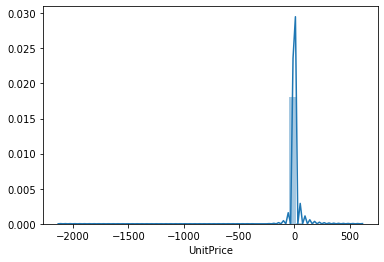

In [89]:
sns.distplot(y_test-predictions)

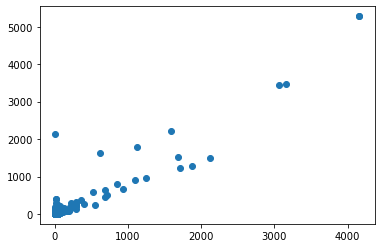

In [90]:
plt.scatter(y_test,predictions)

In [91]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model3.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [108]:
cols_remove_test =[  'InvoiceDate','weekday']

In [96]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122049 entries, 0 to 122048
Data columns (total 23 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   InvoiceNo                              122049 non-null  int64  
 1   StockCode                              122049 non-null  int64  
 2   Description                            122049 non-null  int64  
 3   Quantity                               122049 non-null  int64  
 4   InvoiceDate                            122049 non-null  object 
 5   CustomerID                             122049 non-null  int64  
 6   Country                                122049 non-null  int64  
 7   Invoice_Stock_Description              122049 non-null  int64  
 8   InvoiceAge                             122049 non-null  float64
 9   weekday                                122049 non-null  object 
 10  weekday_ordinal                        122049 non-null  

In [97]:
X_train.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'CustomerID',
       'Country', 'Invoice_Stock_Description', 'InvoiceAge', 'weekday_ordinal',
       'CustomerID_freq', 'InvoiceNo_freq', 'StockCode_freq', 'Quantity_freq',
       'InvoiceDate_freq', 'mean_Country_ordinal_encode',
       'mean_InvoiceNo_ordinal_encode', 'mean_StockCode_ordinal_encode',
       'mean_Description_ordinal_encode', 'mean_InvoiceDate_ordinal_encode',
       'mean_CustomerID_ordinal_encode',
       'mean_Invoice_Stock_Description_encode'],
      dtype='object')

In [109]:
df_test1 = df_test.drop(cols_remove_test,axis=1)

In [110]:
y_pred=rf_random.predict(df_test1)

In [111]:
##Create Sample Submission file and Submit using ANN
pred=pd.DataFrame(y_pred)
#sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([pred],axis=1)
datasets.columns=['UnitPrice']
datasets.to_csv('sample_submission3_rf.csv',index=False)

### KNN

In [ ]:
# Using K_Nearest neighbour regressor
# running for different K values to know which yields the max accuracy.
from sklearn.neighbors import KNeighborsRegressor
score = []
for k in range(1,20):    
    clf = KNeighborsRegressor(n_neighbors = k,  weights = 'distance', p=1)
    clf.fit(X_train, y_train)
    score.append(clf.score(X_test,y_test))

In [ ]:
k_max = score.index(max(score))+1
print( "At K = {}, Max Accuracy = {}".format(k_max, max(score)*100))

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [114]:
from sklearn.pipeline import Pipeline
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', MinMaxScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', MinMaxScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', MinMaxScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', MinMaxScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', MinMaxScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', MinMaxScaler()),('GBM', GradientBoostingRegressor())])))

In [115]:
X_train.head()

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Country,Invoice_Stock_Description,InvoiceAge,weekday_ordinal,CustomerID_freq,...,StockCode_freq,Quantity_freq,InvoiceDate_freq,mean_Country_ordinal_encode,mean_InvoiceNo_ordinal_encode,mean_StockCode_ordinal_encode,mean_Description_ordinal_encode,mean_InvoiceDate_ordinal_encode,mean_CustomerID_ordinal_encode,mean_Invoice_Stock_Description_encode
270280,8906,2892,1170,3,15555,253253,30134697840,9.626718,7,649,...,78,18794,663,3.239283,1.240286,0.657436,0.657436,3.170347,1.718521,0.65
244522,479,1713,1561,12,15194,253253,1280842647,10.445352,1,222,...,347,42076,1364,3.239283,1.992143,2.088300,2.088300,3.072119,2.573243,2.10
229707,12699,2129,3100,4,16485,253253,83812130100,9.164012,2,31,...,373,22609,1344,3.239283,3.314194,0.558606,0.558606,2.860000,3.314194,0.55
52043,15793,162,1781,2,12893,253253,4556627946,9.196867,5,23,...,355,40721,1571,3.239283,2.363043,2.029014,2.029014,2.833991,2.363043,2.08
47676,5026,987,2324,18,15367,253253,11528578488,9.300907,7,70,...,255,1112,723,3.239283,2.277143,2.907647,2.907647,6.089129,3.103286,2.95


In [116]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: nan (nan)
ScaledLASSO: -8376.126642 (22710.327608)
ScaledEN: -8376.126642 (22710.327608)
ScaledKNN: -6757.530150 (18328.602902)
ScaledCART: -5013.219800 (14225.955083)
ScaledGBM: -5801.602792 (16756.833774)


In [ ]:
clf = KNeighborsRegressor(n_neighbors = k_max,  weights = 'distance', p=1)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test ))   
y_pred = clf.predict(X_test)

In [ ]:
import joblib
# save the model to disk
filename = 'KNN_Regressor_model2.sav'
joblib.dump(model, filename)

In [ ]:
y_pred=rf_random.predict(df_test1)

In [ ]:
##Create Sample Submission file and Submit using ANN
pred=pd.DataFrame(y_pred)
#sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([pred],axis=1)
datasets.columns=['UnitPrice']
datasets.to_csv('sample_submission3_rf.csv',index=False)

### LGBM

In [ ]:
def model(train_x,train_y):
    params = {
        'nthread': 10,
         'max_depth': 10,
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'regression_l1',
        'metric': 'rmse', # this is abs(a-e)/max(1,a)

        'num_leaves': 64,
        'learning_rate': 0.2,
       'feature_fraction': 0.9,
       'bagging_fraction': 0.8,
        'bagging_freq': 15,
        'lambda_l1': 3.097758978478437,
        'lambda_l2': 2.9482537987198496,
        'verbose': 1,
        'min_child_weight': 6.996211413900573,
        'min_split_gain': 0.037310344962162616,
        }
    
    lgb_train = lgb.Dataset(train_x,train_y)
    model = lgb.train(params, lgb_train, 3000)
    y_test = model.predict(test_data_x)
    return y_test,model

In [ ]:
y_test, model = model(train_data_x,train_data_y)

In [ ]:
import pandas as pd
y_test=pd.DataFrame(y_test)
y_test.columns= ['UnitPrice']
y_test.to_csv('submission_lgbm2.csv',index=False)

### ANN

In [117]:
df_train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Stock_Description,InvoiceAge,...,StockCode_freq,Quantity_freq,InvoiceDate_freq,mean_Country_ordinal_encode,mean_InvoiceNo_ordinal_encode,mean_StockCode_ordinal_encode,mean_Description_ordinal_encode,mean_InvoiceDate_ordinal_encode,mean_CustomerID_ordinal_encode,mean_Invoice_Stock_Description_encode
0,6141,1583,144,3,2011-06-05,3.75,14056,253253,1399853232,9.465182,...,331,18794,901,3.239283,3.241765,3.745770,3.745770,2.939234,2.795714,3.75
1,6349,1300,3682,6,2011-11-05,1.95,13098,253253,30390123400,9.046282,...,194,26375,1030,3.239283,3.028519,1.972887,1.972887,3.307942,2.917792,1.95
2,16783,2178,1939,4,2011-11-20,5.95,15044,253253,70876992186,9.005213,...,317,22609,2190,3.239283,3.824634,5.896372,5.896372,2.573858,4.957427,5.95
3,16971,2115,2983,1,2011-11-22,0.83,15525,253253,107070802695,8.999737,...,328,51253,1999,3.239283,1.532857,0.824970,0.824970,2.756038,2.888281,0.83
4,6080,1210,2886,12,2011-06-05,1.65,13952,253253,21231724800,9.465182,...,114,42076,901,3.239283,3.426000,1.635965,1.635965,2.939234,3.778221,1.65


In [119]:
X=df_train.drop(['UnitPrice','InvoiceDate','weekday'],axis=1)
y=df_train['UnitPrice']

In [120]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284780 entries, 0 to 284779
Data columns (total 21 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   InvoiceNo                              284780 non-null  int64  
 1   StockCode                              284780 non-null  int64  
 2   Description                            284780 non-null  int64  
 3   Quantity                               284780 non-null  int64  
 4   CustomerID                             284780 non-null  int64  
 5   Country                                284780 non-null  int64  
 6   Invoice_Stock_Description              284780 non-null  int64  
 7   InvoiceAge                             284780 non-null  float64
 8   weekday_ordinal                        284780 non-null  int64  
 9   CustomerID_freq                        284780 non-null  int64  
 10  InvoiceNo_freq                         284780 non-null  

In [121]:
import numpy as np
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# Importing the dataset



# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.08, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 21))

# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer

model.add(Dense(units = 1))

#model.add(Dense(1))
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size = 10, epochs = 100)



Epoch 1/100
26200/26200 [==============================] - 20s 777us/step - loss: 346.0782
Epoch 2/100
26200/26200 [==============================] - 20s 776us/step - loss: 214.2820
Epoch 3/100
26200/26200 [==============================] - 21s 808us/step - loss: 177.5502
Epoch 4/100
26200/26200 [==============================] - 23s 877us/step - loss: 209.8353
Epoch 5/100
26200/26200 [==============================] - 20s 748us/step - loss: 77.3454
Epoch 6/100
26200/26200 [==============================] - 18s 704us/step - loss: 120.0843
Epoch 7/100
26200/26200 [==============================] - 18s 683us/step - loss: 158.1078
Epoch 8/100
26200/26200 [==============================] - 18s 701us/step - loss: 224.6571
Epoch 9/100
26200/26200 [==============================] - 19s 722us/step - loss: 198.4509
Epoch 10/100
26200/26200 [==============================] - 18s 703us/step - loss: 594.1517
Epoch 11/100
26200/26200 [==============================] - 21s 803us/step - loss: 483.210

26200/26200 [==============================] - 18s 700us/step - loss: 73.8339
Epoch 91/100
26200/26200 [==============================] - 18s 695us/step - loss: 62.2875
Epoch 92/100
26200/26200 [==============================] - 18s 695us/step - loss: 75.9614
Epoch 93/100
26200/26200 [==============================] - 18s 699us/step - loss: 55.5401
Epoch 94/100
26200/26200 [==============================] - 19s 707us/step - loss: 121.0656
Epoch 95/100
26200/26200 [==============================] - 17s 666us/step - loss: 66.5697
Epoch 96/100
26200/26200 [==============================] - 17s 665us/step - loss: 54.0934
Epoch 97/100
26200/26200 [==============================] - 17s 666us/step - loss: 60.1959
Epoch 98/100
26200/26200 [==============================] - 18s 670us/step - loss: 76.8132
Epoch 99/100
26200/26200 [==============================] - 18s 668us/step - loss: 112.8380
Epoch 100/100
26200/26200 [==============================] - 17s 667us/step - loss: 48.4839


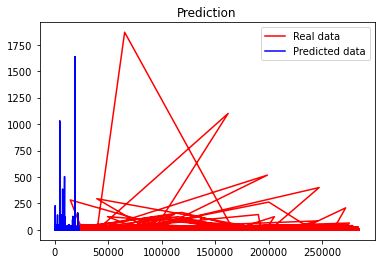

In [122]:
y_pred = model.predict(X_test)

plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [123]:
y.describe()

count    284780.000000
mean          3.451216
std          78.399541
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: UnitPrice, dtype: float64

In [128]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122049 entries, 0 to 122048
Data columns (total 21 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   InvoiceNo                              122049 non-null  int64  
 1   StockCode                              122049 non-null  int64  
 2   Description                            122049 non-null  int64  
 3   Quantity                               122049 non-null  int64  
 4   CustomerID                             122049 non-null  int64  
 5   Country                                122049 non-null  int64  
 6   Invoice_Stock_Description              122049 non-null  int64  
 7   InvoiceAge                             122049 non-null  float64
 8   weekday_ordinal                        122049 non-null  int64  
 9   CustomerID_freq                        122049 non-null  int64  
 10  InvoiceNo_freq                         122049 non-null  

In [126]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284780 entries, 0 to 284779
Data columns (total 21 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   InvoiceNo                              284780 non-null  int64  
 1   StockCode                              284780 non-null  int64  
 2   Description                            284780 non-null  int64  
 3   Quantity                               284780 non-null  int64  
 4   CustomerID                             284780 non-null  int64  
 5   Country                                284780 non-null  int64  
 6   Invoice_Stock_Description              284780 non-null  int64  
 7   InvoiceAge                             284780 non-null  float64
 8   weekday_ordinal                        284780 non-null  int64  
 9   CustomerID_freq                        284780 non-null  int64  
 10  InvoiceNo_freq                         284780 non-null  

In [129]:
y_pred = model.predict(df_test1)

In [133]:
y_pred.shape

(122049, 1)

In [132]:
# for inverse transformation
inversed = sc.inverse_transform(y_pred)

ValueError: non-broadcastable output operand with shape (122049,1) doesn't match the broadcast shape (122049,21)

In [130]:
##Create Sample Submission file and Submit using ANN
pred=pd.DataFrame(y_pred)
#sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([pred],axis=1)
datasets.columns=['UnitPrice']
datasets.to_csv('sample_submission1_ANN.csv',index=False)

In [ ]:
def feature_importances_(self):
    """Return the feature importances (the higher, the more important the
       feature).
    Returns
    -------
    feature_importances_ : array, shape = [n_features]
    """
    if self.estimators_ is None or len(self.estimators_) == 0:
        raise NotFittedError("Estimator not fitted, "
                             "call `fit` before `feature_importances_`.")

    all_importances = Parallel(n_jobs=self.n_jobs,
                               backend="threading")(
        delayed(getattr)(tree, 'feature_importances_')
        for tree in self.estimators_)

    return sum(all_importances) / len(self.estimators_)